In [29]:
import numpy as np
import pylab as pl
import matplotlib as mpl

import sklearn


In [30]:
from scipy import linalg
import sklearn.discriminant_analysis

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [32]:
# load sample dataset
from sklearn.datasets import load_iris


In [33]:
iris = load_iris()
X = iris.data[:,:2] # Take only 2 dimensions
y = iris.target
X = X[y > 0]
y = y[y > 0]
y -= 1
target_names = iris.target_names[1:]

In [34]:
print(X)

[[ 7.   3.2]
 [ 6.4  3.2]
 [ 6.9  3.1]
 [ 5.5  2.3]
 [ 6.5  2.8]
 [ 5.7  2.8]
 [ 6.3  3.3]
 [ 4.9  2.4]
 [ 6.6  2.9]
 [ 5.2  2.7]
 [ 5.   2. ]
 [ 5.9  3. ]
 [ 6.   2.2]
 [ 6.1  2.9]
 [ 5.6  2.9]
 [ 6.7  3.1]
 [ 5.6  3. ]
 [ 5.8  2.7]
 [ 6.2  2.2]
 [ 5.6  2.5]
 [ 5.9  3.2]
 [ 6.1  2.8]
 [ 6.3  2.5]
 [ 6.1  2.8]
 [ 6.4  2.9]
 [ 6.6  3. ]
 [ 6.8  2.8]
 [ 6.7  3. ]
 [ 6.   2.9]
 [ 5.7  2.6]
 [ 5.5  2.4]
 [ 5.5  2.4]
 [ 5.8  2.7]
 [ 6.   2.7]
 [ 5.4  3. ]
 [ 6.   3.4]
 [ 6.7  3.1]
 [ 6.3  2.3]
 [ 5.6  3. ]
 [ 5.5  2.5]
 [ 5.5  2.6]
 [ 6.1  3. ]
 [ 5.8  2.6]
 [ 5.   2.3]
 [ 5.6  2.7]
 [ 5.7  3. ]
 [ 5.7  2.9]
 [ 6.2  2.9]
 [ 5.1  2.5]
 [ 5.7  2.8]
 [ 6.3  3.3]
 [ 5.8  2.7]
 [ 7.1  3. ]
 [ 6.3  2.9]
 [ 6.5  3. ]
 [ 7.6  3. ]
 [ 4.9  2.5]
 [ 7.3  2.9]
 [ 6.7  2.5]
 [ 7.2  3.6]
 [ 6.5  3.2]
 [ 6.4  2.7]
 [ 6.8  3. ]
 [ 5.7  2.5]
 [ 5.8  2.8]
 [ 6.4  3.2]
 [ 6.5  3. ]
 [ 7.7  3.8]
 [ 7.7  2.6]
 [ 6.   2.2]
 [ 6.9  3.2]
 [ 5.6  2.8]
 [ 7.7  2.8]
 [ 6.3  2.7]
 [ 6.7  3.3]
 [ 7.2  3.2]
 [ 6.2  2.8]

In [37]:
print(y[1])

0


C:\Users\Spectre\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:664: DeprecationWarning: 'store_covariances' was renamed to store_covariance in version 0.19 and will be removed in 0.21.
  DeprecationWarning)
C:\Users\Spectre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function covariances_ is deprecated; Attribute covariances_ was deprecated in version 0.19 and will be removed in 0.21. Use covariance_ instead
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Spectre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function covariances_ is deprecated; Attribute covariances_ was deprecated in version 0.19 and will be removed in 0.21. Use covariance_ instead
  warnings.warn(msg, category=DeprecationWarning)


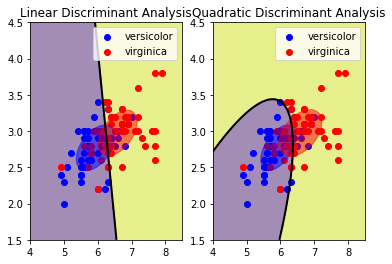

In [24]:




################################################################################
# LDA
lda = LDA(store_covariance=True)
y_pred = lda.fit(X, y).predict(X)

# QDA
qda = QDA(store_covariances=True)
y_pred = qda.fit(X, y).predict(X)

###############################################################################
# Plot results

def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1]/u[0])
    angle = 180 * angle / np.pi # convert to degrees
    # filled gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                                            180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

xx, yy = np.meshgrid(np.linspace(4, 8.5, 200), np.linspace(1.5, 4.5, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_lda = lda.predict_proba(X_grid)[:,1].reshape(xx.shape)
zz_qda = qda.predict_proba(X_grid)[:,1].reshape(xx.shape)

pl.figure()
splot = pl.subplot(1, 2, 1)
pl.contourf(xx, yy, zz_lda > 0.5, alpha=0.5)
pl.scatter(X[y==0,0], X[y==0,1], c='b', label=target_names[0])
pl.scatter(X[y==1,0], X[y==1,1], c='r', label=target_names[1])
pl.contour(xx, yy, zz_lda, [0.5], linewidths=2., colors='k')
plot_ellipse(splot, lda.means_[0], lda.covariance_, 'b')
plot_ellipse(splot, lda.means_[1], lda.covariance_, 'r')
pl.legend()
pl.axis('tight')
pl.title('Linear Discriminant Analysis')

splot = pl.subplot(1, 2, 2)
pl.contourf(xx, yy, zz_qda > 0.5, alpha=0.5)
pl.scatter(X[y==0,0], X[y==0,1], c='b', label=target_names[0])
pl.scatter(X[y==1,0], X[y==1,1], c='r', label=target_names[1])
pl.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k')
plot_ellipse(splot, qda.means_[0], qda.covariances_[0], 'b')
plot_ellipse(splot, qda.means_[1], qda.covariances_[1], 'r')
pl.legend()
pl.axis('tight')
pl.title('Quadratic Discriminant Analysis')
pl.show()